1. Data Cleaning
2. Analysis
3. Modelling
4. Review


In [116]:
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

<h1>File and Data Field Descriptions</h1>
<ul>
<li><strong>train.csv</strong> - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.<ul>
<li><code>PassengerId</code> - A unique Id for each passenger. Each Id takes the form <code>gggg_pp</code> where <code>gggg</code> indicates a group the passenger is travelling with and <code>pp</code> is their number within the group. People in a group are often family members, but not always.</li>
<li><code>HomePlanet</code> - The planet the passenger departed from, typically their planet of permanent residence.</li>
<li><code>CryoSleep</code> - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.</li>
<li><code>Cabin</code> - The cabin number where the passenger is staying. Takes the form <code>deck/num/side</code>, where <code>side</code> can be either <code>P</code> for <em>Port</em> or <code>S</code> for <em>Starboard</em>.</li>
<li><code>Destination</code> - The planet the passenger will be debarking to.</li>
<li><code>Age</code> - The age of the passenger.</li>
<li><code>VIP</code> - Whether the passenger has paid for special VIP service during the voyage.</li>
<li><code>RoomService</code>, <code>FoodCourt</code>, <code>ShoppingMall</code>, <code>Spa</code>, <code>VRDeck</code> - Amount the passenger has billed at each of the <em>Spaceship Titanic</em>'s many luxury amenities.</li>
<li><code>Name</code> - The first and last names of the passenger.</li>
<li><code>Transported</code> - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.</li></ul></li>
<li><strong>test.csv</strong> - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of <code>Transported</code> for the passengers in this set. </li>
<li><strong>sample_submission.csv</strong> - A submission file in the correct format.<ul>
<li><code>PassengerId</code> - Id for each passenger in the test set.</li>
<li><code>Transported</code> - The target. For each passenger, predict either <code>True</code> or <code>False</code>.</li></ul></li>
</ul>

# Data Cleaning

1. Which features are categorical and which are numerical?
2. Available Data Types?
3. None, blank or empty values

# Which features are categorical and which are numerical?

In [117]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [118]:
print("Categorical Variables")
print("---------------------")
categorical_variables = train_data.select_dtypes(include=['object']).columns
for col in categorical_variables:
  print(col)

Categorical Variables
---------------------
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [119]:
print("Numerical Variables")
print("---------------------")
numerical_variables = train_data.select_dtypes(include=['float64']).columns
for col in numerical_variables:
  print(col)

Numerical Variables
---------------------
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


In [120]:
print("Number of None Values")
print("---------------------")
for col in train_data.columns:
  print(col,train_data[col].isnull().sum())

Number of None Values
---------------------
PassengerId 0
HomePlanet 201
CryoSleep 217
Cabin 199
Destination 182
Age 179
VIP 203
RoomService 181
FoodCourt 183
ShoppingMall 208
Spa 183
VRDeck 188
Name 200
Transported 0


# Approches to handle with None Values:

1. Replace None values with the most common value in the column (in the case categorical variables)
2. Remove the rows that have None values.
3. Replace the values with the mean (for numerical values, continuous)

In [121]:
"""
# Removing the rows that have None Values
print(len(train_data))
for col in train_data.columns:
  train_data.dropna(subset=[col], inplace=True)
print(len(train_data))
# Big loss !
# Bad Option
"""

'\n# Removing the rows that have None Values\nprint(len(train_data))\nfor col in train_data.columns:\n  train_data.dropna(subset=[col], inplace=True)\nprint(len(train_data))\n# Big loss !\n# Bad Option\n'

# Approches to handle with None Values:

Categorical variables:
+ Replace None values with the most common value in the column

Numerical variables:
+ Replace the values with the mean (for numerical values, continuous)

In [122]:
"""
# Dealing with none values for categorical variables
for cat_col in categorical_variables:
  train_data[cat_col].fillna(train_data[cat_col].mode()[0],inplace=True)
"""

'\n# Dealing with none values for categorical variables\nfor cat_col in categorical_variables:\n  train_data[cat_col].fillna(train_data[cat_col].mode()[0],inplace=True)\n'

In [123]:
# Edited above code for not replacing name feauture
for cat_col in categorical_variables:
  if cat_col != "Name":
    train_data[cat_col].fillna(train_data[cat_col].mode()[0],inplace=True)

In [124]:
for cat_col in categorical_variables:
    print(cat_col,train_data[cat_col].isnull().sum())

PassengerId 0
HomePlanet 0
CryoSleep 0
Cabin 0
Destination 0
VIP 0
Name 200


In [125]:
# Dealing with none values for numerical values
for num_col in numerical_variables:
  train_data[num_col] = train_data[num_col].fillna(train_data[num_col].mean())

In [126]:
for num_col in numerical_variables:
  print(num_col,train_data[num_col].isnull().sum())

Age 0
RoomService 0
FoodCourt 0
ShoppingMall 0
Spa 0
VRDeck 0


# Analysis
1. Data Exploration
2. Feature Engineering
3. Data Visualization


# Data Exploration

In [127]:
# For continuous variables
train_data.describe()
# minimum age is 0 that is weird

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [128]:
# For categorical variables
train_data.describe(include=['O'])
# Many types of cabin 'interesting'


,PassengerId,HomePlanet,Cabin,Destination,Name
count,8693,8693,8693,8693,8493
unique,8693,3,6560,3,8473
top,0001_01,Earth,G/734/S,TRAPPIST-1e,Gollux Reedall
freq,1,4803,207,6097,2


In [129]:
"""
train_data[train_data['Name']=='Alraium Disivering']
# A lot of people with the same name in this ship!
# Thats because we replace all NaN values with mode of the data
"""


"\ntrain_data[train_data['Name']=='Alraium Disivering']\n# A lot of people with the same name in this ship!\n# Thats because we replace all NaN values with mode of the data\n"

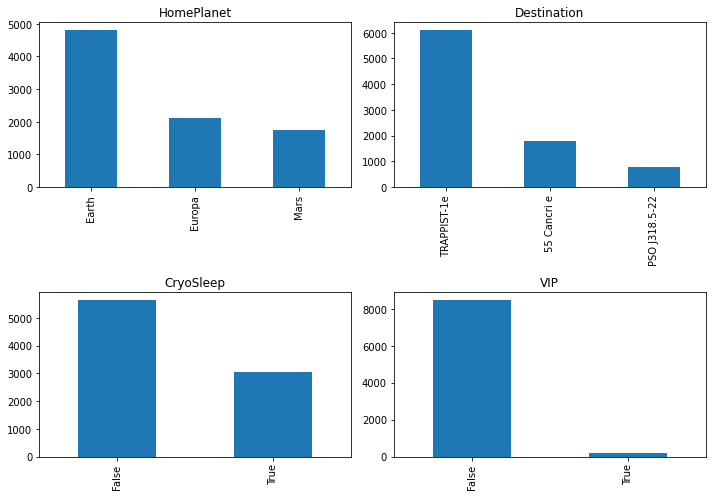

In [130]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
train_data['HomePlanet'].value_counts().plot(kind='bar',title='HomePlanet')
plt.subplot(2,2,2)
train_data['Destination'].value_counts().plot(kind='bar',title='Destination')
plt.subplot(2,2,3)
train_data['CryoSleep'].value_counts().plot(kind='bar',title='CryoSleep')
plt.subplot(2,2,4)
train_data['VIP'].value_counts().plot(kind='bar',title='VIP')
plt.tight_layout()

In [131]:
train_data['VIP'].value_counts()
# Unblanced distribution

False    8494
True      199
Name: VIP, dtype: int64

In [132]:
numerical_variables = list(numerical_variables)

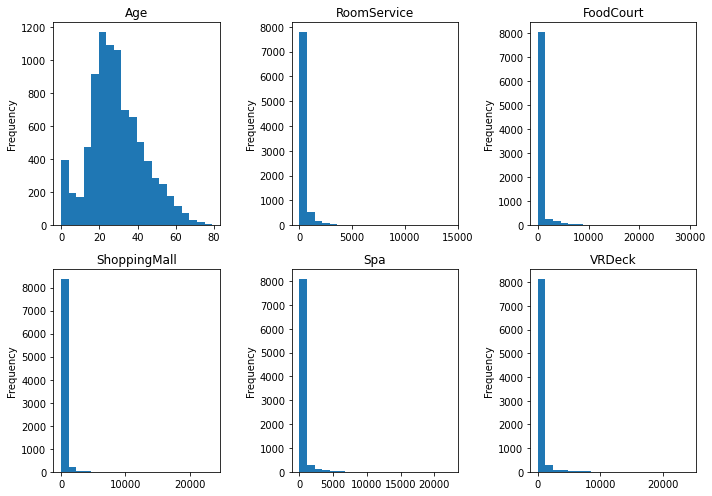

In [133]:
plt.figure(figsize=(10,7))
for i,num_col in enumerate(numerical_variables):
  plt.subplot(2,3,i+1)
  train_data[num_col].plot(kind='hist',bins=20)
  plt.title(num_col)
plt.tight_layout()

# Feature Engineering
1. Build 2 features out of the 'Cabin' column: deck and port
2. ~~Build a feature called group from the passengerid variable~~

In [134]:
# Building the deck and port features from the 'cabin' column
train_data['Deck'] = train_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
train_data['Port'] = train_data['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')
train_data['Deck'] = train_data['Deck'].map({'B':0, 'F':1 , 'A':2, 'G':3, 'E': 4, 'D':5, 'C':6,'T':7}).astype(int)
train_data['Port'] = train_data['Port'].map({'P':0,'S':1}).astype(int)
train_data.drop(['Cabin'],axis=1,inplace=True)
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Port
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1


In [135]:
train_data["HomePlanet"] = train_data["HomePlanet"].map({'Earth':0,'Europa':1,'Mars':2}).astype(int)
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Port
0,0001_01,1,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0
1,0002_01,0,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,1
2,0003_01,1,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2,1
3,0003_02,1,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,1
4,0004_01,0,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1


In [136]:
unique_destinations = train_data["Destination"].unique()
train_data["Destination"] = train_data["Destination"].map(dict(zip(unique_destinations,list(range(len(unique_destinations)))))).astype(int)
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Port
0,0001_01,1,False,0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0
1,0002_01,0,False,0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,1
2,0003_01,1,False,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2,1
3,0003_02,1,False,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,1
4,0004_01,0,False,0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1


In [137]:
train_data_passengerid = train_data['PassengerId']
train_data = train_data.drop(['PassengerId'],axis=1)

In [138]:
train_data_transported = train_data['Transported']
train_data = train_data.drop(['Transported'],axis=1)

In [139]:
train_data_names = train_data["Name"]
train_data = train_data.drop(["Name"],axis=1)

In [140]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Port
0,1,False,0,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0
1,0,False,0,24.0,False,109.0,9.0,25.0,549.0,44.0,1,1
2,1,False,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,2,1
3,1,False,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,2,1
4,0,False,0,16.0,False,303.0,70.0,151.0,565.0,2.0,1,1


In [141]:
unique_vip = train_data['VIP'].unique()
train_data['VIP'] = train_data['VIP'].map(dict(zip(unique_vip,list(range(len(unique_vip)))))).astype(int)

In [142]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Port
0,1,False,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0
1,0,False,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1
2,1,False,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,2,1
3,1,False,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,2,1
4,0,False,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1


In [143]:
unique_cryosleep = train_data["CryoSleep"].unique()
train_data["CryoSleep"] = train_data["CryoSleep"].map(dict(zip(unique_cryosleep,list(range(len(unique_cryosleep)))))).astype(int)

In [144]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Port
0,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0
1,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1
2,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,2,1
3,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,2,1
4,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1


# For Test Data

In [145]:
# Edited above code for not replacing name feauture
for cat_col in categorical_variables:
    test_data[cat_col].fillna(test_data[cat_col].mode()[0],inplace=True)
for cat_col in categorical_variables:
    print(cat_col,test_data[cat_col].isnull().sum())
# Dealing with none values for numerical values
for num_col in numerical_variables:
    test_data[num_col] = test_data[num_col].fillna(test_data[num_col].mean())
for num_col in numerical_variables:
    print(num_col,test_data[num_col].isnull().sum())

PassengerId 0
HomePlanet 0
CryoSleep 0
Cabin 0
Destination 0
VIP 0
Name 0
Age 0
RoomService 0
FoodCourt 0
ShoppingMall 0
Spa 0
VRDeck 0


In [146]:
test_data_passengerid = test_data['PassengerId']
test_data = test_data.drop(['PassengerId','Name'],axis=1)
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [147]:
test_data["HomePlanet"] = test_data["HomePlanet"].map({'Earth':0,'Europa':1,'Mars':2}).astype(int)
unique_cryosleep = test_data["CryoSleep"].unique()
test_data["CryoSleep"] = test_data["CryoSleep"].map(dict(zip(unique_cryosleep,list(range(len(unique_cryosleep)))))).astype(int)
# Building the deck and port features from the 'cabin' column
test_data['Deck'] = test_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
test_data['Port'] = test_data['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')
test_data['Deck'] = test_data['Deck'].map({'B':0, 'F':1 , 'A':2, 'G':3, 'E': 4, 'D':5, 'C':6,'T':7}).astype(int)
test_data['Port'] = test_data['Port'].map({'P':0,'S':1}).astype(int)
test_data.drop(['Cabin'],axis=1,inplace=True)
unique_destinations = test_data["Destination"].unique()
test_data["Destination"] = test_data["Destination"].map(dict(zip(unique_destinations,list(range(len(unique_destinations)))))).astype(int)
unique_vip = test_data['VIP'].unique()
test_data['VIP'] = test_data['VIP'].map(dict(zip(unique_vip,list(range(len(unique_vip)))))).astype(int)

In [148]:
test_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Port
0,0,0,0,27.0,0,0.0,0.0,0.0,0.0,0.0,3,1
1,0,1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,1
2,1,0,1,31.0,0,0.0,0.0,0.0,0.0,0.0,6,1
3,1,1,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,6,1
4,0,1,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,1


# Modelling
1. Train test split of our training data
2. Fit a few models: Logistic Regression, Random Forest, Naive bayes, Rige Classifier, Neural Network
3. Plot the results
4. Pick a winner
5. Submit our predictions

In [149]:
X_train = train_data
y_train = train_data_transported

In [150]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.3,random_state=42)

In [151]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Ridge
from sklearn.linear_model import RidgeClassifier
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Neural Networks
from sklearn.neural_network import MLPClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Support Vector Machine
from sklearn.svm import LinearSVC


In [152]:
# Crete an object using the LogisticRegression() class
logistic_model = LogisticRegression()

# Create an object using the RidgeClassifier() class
ridge_model = RidgeClassifier()

# Create an object using the DecisionTreeClassifier() class
decisiontree_model = DecisionTreeClassifier()

# Create an object using the GaussianNB() class
naive_bayes_model = GaussianNB()

# Create an object using the MLPClassifier() class
neural_network_model = MLPClassifier()

# Create an object using the LinearSVC() class
svm_model = LinearSVC()

# Create an object using the RandomForestClassifier() class
randomforest_model = RandomForestClassifier()

In [153]:
# Train the Logistic Classifier model
logistic_model.fit(X_train,y_train)

# Train the Ridge Classifier model
ridge_model.fit(X_train,y_train)

# Train the decision tree classifier model
decisiontree_model.fit(X_train,y_train)

# Train the Naive Bayes model
naive_bayes_model.fit(X_train,y_train)

# Train the neural network model
neural_network_model.fit(X_train,y_train)

# Train the SVC model
svm_model.fit(X_train,y_train)

# Train the Random Forest model
randomforest_model.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RandomForestClassifier()

In [154]:
# Make prediction using the test dataset on Logistic Classifier model
logistic_pred = logistic_model.predict(X_test)

# Make prediction using the test dataset on Ridge Classifier model
ridge_pred = ridge_model.predict(X_test)

# Make prediction using the test dataset on Decision Tree Classifier model
decisiontree_pred = decisiontree_model.predict(X_test)

# Make prediction using the test dataset on Naive Bayes classifier model
naivebayes_pred = naive_bayes_model.predict(X_test)

# Make prediction using the test dataset on Neural Network model
neural_network_pred = neural_network_model.predict(X_test)

# Make prediction using the test dataset on Support Vector Machine model
svm_pred = svm_model.predict(X_test)

# Make prediction using the test dataset on Random Forest Classifier model
randomforest_pred = randomforest_model.predict(X_test)

In [155]:
lg_pred_score = logistic_model.score(X_test,y_test)
ridge_pred_score = ridge_model.score(X_test,y_test)
decisiontree_pred_score = decisiontree_model.score(X_test,y_test)
naive_bayes_pred_score = naive_bayes_model.score(X_test,y_test)
neural_network_pred_score = neural_network_model.score(X_test,y_test)
svm_pred_score = svm_model.score(X_test,y_test)
randomforest_pred_score = randomforest_model.score(X_test,y_test)

In [156]:
df = pd.DataFrame(dict(model=['Logistic Regression',
                              'Ridge Classifier',
                              'Decision Tree',
                              'Naive Bayes',
                              'Neural Network',
                              'Support Vector Machine',
                              'Random Forest'
                              ], accuracy=[lg_pred_score,
                                           ridge_pred_score,
                                           decisiontree_pred_score,
                                           naive_bayes_pred_score,
                                           neural_network_pred_score,
                                           svm_pred_score,
                                           randomforest_pred_score]))
df

,model,accuracy
0,Logistic Regression,0.776457
1,Ridge Classifier,0.752301
2,Decision Tree,0.741181
3,Naive Bayes,0.698236
4,Neural Network,0.780675
5,Support Vector Machine,0.748850
6,Random Forest,0.781442


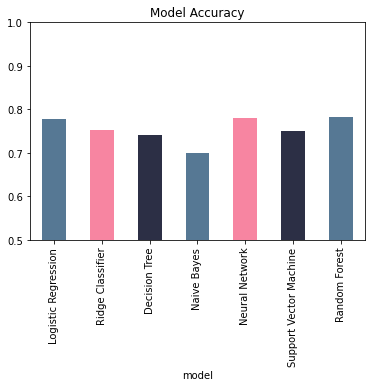

In [157]:
df.plot(kind='bar',x='model',y='accuracy',title='Model Accuracy',legend=False,
        color=['#567894','#F785A1','#2C2F45'])
plt.ylim(0.5,1);

In [161]:
# Make prediction using the test dataset on Random Forest Classifier model
randomforest_pred = randomforest_model.predict(test_data)

In [168]:
df_submissions = pd.DataFrame({'PassengerId': test_data_passengerid,'Transported':randomforest_pred})
df_submissions.to_csv('./submission.csv',index=False)

# I don't get why this code get 0.54173 score
